<a href="https://colab.research.google.com/github/jamieth0405/MAT421_Project/blob/main/DAT402_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**DAT402 Project 1**

Group Members: Jamie Dinh, Gabriel Pascual


###**Loan Approval Dataset**


In this project, we aim to predict loan approval outcomes using a dataset sourced from Kaggle. The dataset contains information about loan applicants, including features such as income, credit history, loan amount, and employment status. The target variable is a binary classification indicating whether the loan is risky or not. Our goal is to build and compare predictive models using at least two different algorithms, such as *Logistic Regression* *with Regularization* and *Naive Bayes*, to determine which model performs best for this task.

Dataset: [Loan_approval_dataset.csv](https://www.kaggle.com/datasets/suryadeepthi/loan-approval-dataset/data)

Features:

*   Applicant_ID (numerical) - not a predictor
*   Age (numerical)
*   Income (numerical)
*   Credit_Score (numerical)
*   Loan_Amount (numerical)
*   Loan_Term (numerical)
*   Interest_Rate (numerical)
*   Employment_Status (categorical)
*   Debt_to_Income_Ratio (numerical)
*   Marital_Status (categorical)
*   Number_of_Dependents (numerical)
*   Property_Ownership (categorical)
*   Loan_Purpose (categorical)
*   Previous_Defaults (binary)

Target: Previous_Defaults (binary) will be renamed to Risk_Flag (binary).



###**Import Libraries and Dataset**

First, we need to import necessary libraries for data analysis, visualization, and machine learning. Then we will load the dataset and display an overview of the data:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve

In [ ]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()

Saving loan_approval_dataset.csv to loan_approval_dataset (1).csv


In [ ]:
# Load data
loan_df = pd.read_csv('loan_approval_dataset.csv', encoding='latin1')

print('Shape: ',loan_df.shape)

loan_df.head()

Shape:  (5000, 14)


,Applicant_ID,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Interest_Rate,Employment_Status,Debt_to_Income_Ratio,Marital_Status,Number_of_Dependents,Property_Ownership,Loan_Purpose,Previous_Defaults
0,1,56,21920,639,452748,72,4.53,Unemployed,43.35,Married,2,Mortgage,Business,0
1,2,69,126121,655,257134,60,5.38,Unemployed,10.42,Divorced,0,Mortgage,Education,0
2,3,46,96872,467,226437,72,3.46,Self-Employed,45.39,Divorced,4,Mortgage,Car,0
3,4,32,101132,751,310480,12,14.00,Unemployed,8.58,Single,2,Mortgage,Business,0
4,5,60,22093,404,13070,12,9.13,Self-Employed,20.70,Divorced,1,Mortgage,Home,0


###**Data Cleaning and Pre-Processing**

Now we need to clean the data before performing the analysis. Since the variable 'Applicant_ID' is not one of our predictors, we will remove that column from our data frame. Then we check for missing values in other columns and drop rows with missing values (if applicable).

In [ ]:
loan_df = loan_df.drop(columns=["Applicant_ID"])

print('Shape: ', loan_df.shape)
loan_df.head()

Shape:  (5000, 13)


,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Interest_Rate,Employment_Status,Debt_to_Income_Ratio,Marital_Status,Number_of_Dependents,Property_Ownership,Loan_Purpose,Previous_Defaults
0,56,21920,639,452748,72,4.53,Unemployed,43.35,Married,2,Mortgage,Business,0
1,69,126121,655,257134,60,5.38,Unemployed,10.42,Divorced,0,Mortgage,Education,0
2,46,96872,467,226437,72,3.46,Self-Employed,45.39,Divorced,4,Mortgage,Car,0
3,32,101132,751,310480,12,14.00,Unemployed,8.58,Single,2,Mortgage,Business,0
4,60,22093,404,13070,12,9.13,Self-Employed,20.70,Divorced,1,Mortgage,Home,0


In [ ]:
# Check for missing values
loan_df.isnull().sum()

,0
Age,0
Income,0
Credit_Score,0
Loan_Amount,0
Loan_Term,0
Interest_Rate,0
Employment_Status,0
Debt_to_Income_Ratio,0
Marital_Status,0
Number_of_Dependents,0


In [ ]:
# Drop rows with missing values (just in case)
loan_df = loan_df.dropna()

loan_df

,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Interest_Rate,Employment_Status,Debt_to_Income_Ratio,Marital_Status,Number_of_Dependents,Property_Ownership,Loan_Purpose,Previous_Defaults
0,56,21920,639,452748,72,4.53,Unemployed,43.35,Married,2,Mortgage,Business,0
1,69,126121,655,257134,60,5.38,Unemployed,10.42,Divorced,0,Mortgage,Education,0
2,46,96872,467,226437,72,3.46,Self-Employed,45.39,Divorced,4,Mortgage,Car,0
3,32,101132,751,310480,12,14.00,Unemployed,8.58,Single,2,Mortgage,Business,0
4,60,22093,404,13070,12,9.13,Self-Employed,20.70,Divorced,1,Mortgage,Home,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,24,169594,755,299944,48,9.42,Self-Employed,40.83,Married,1,Mortgage,Home,0
4996,66,162728,829,15886,24,3.47,Unemployed,34.88,Married,1,Own,Education,0
4997,26,166965,468,477830,48,9.08,Self-Employed,37.84,Married,4,Own,Business,0
4998,53,36493,442,205981,60,12.39,Self-Employed,18.83,Widowed,0,Mortgage,Business,0


###**Exploratory Data Analysis**

Now we need to perform exploratory data analysis to understand the data distribution and relationships between variables using the histograms, count plots, kde plots and correlation heatmap.


<ipython-input-7-c2e23616886e>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  loan_df.hist(ax=ax1, bins=20);


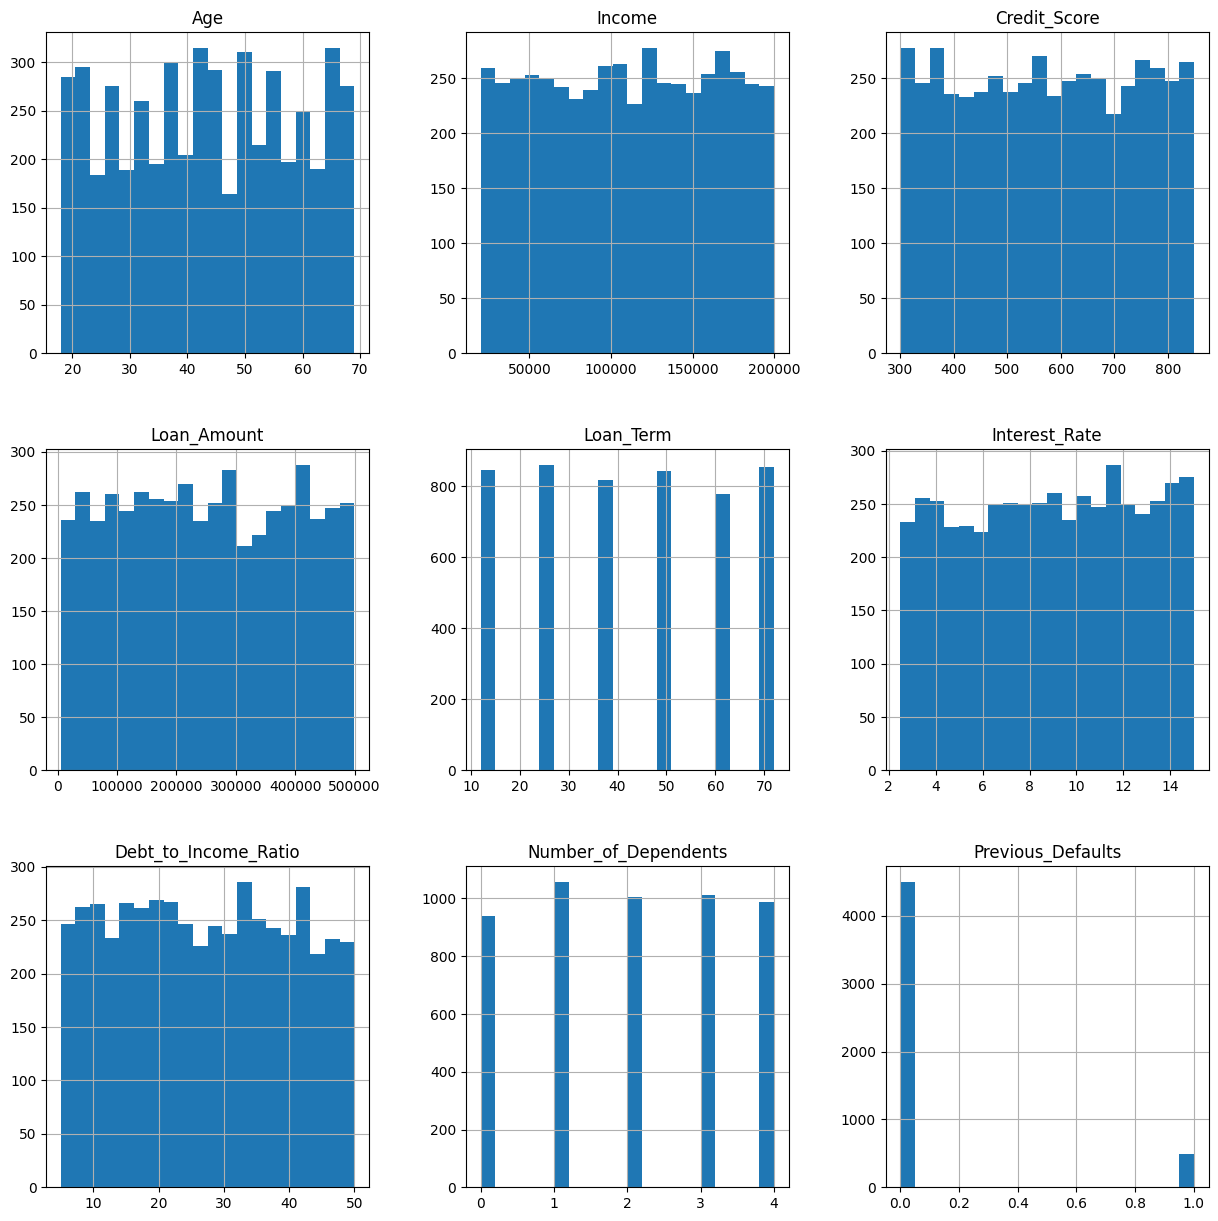

In [ ]:
fig1, ax1 = plt.subplots(1, 1, figsize=(15,15))

loan_df.hist(ax=ax1, bins=20);

Observation: The histograms reveal the distribution of numerical features, showing skewness in some variables like income, loan amount and debt-to-income ratio. There could be some potential outliers or data imbalances that may need to be addressed during model building.

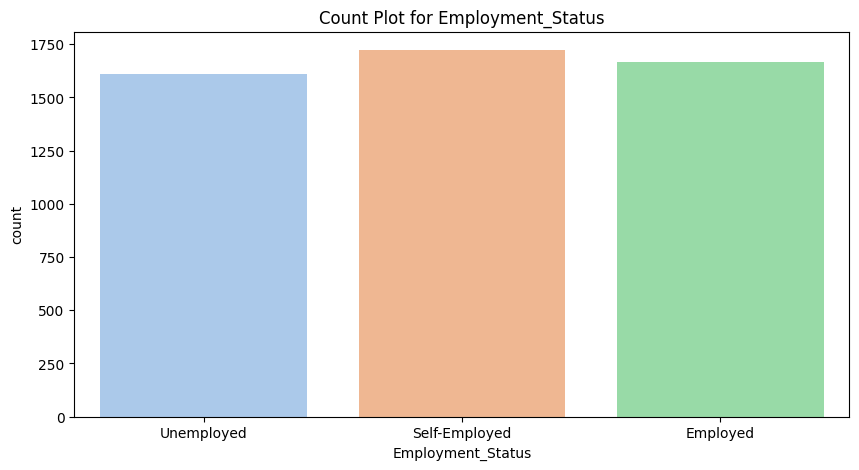

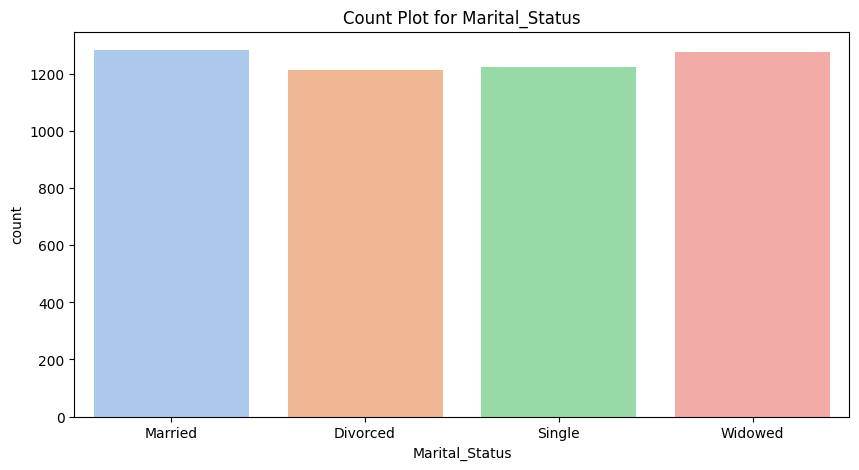

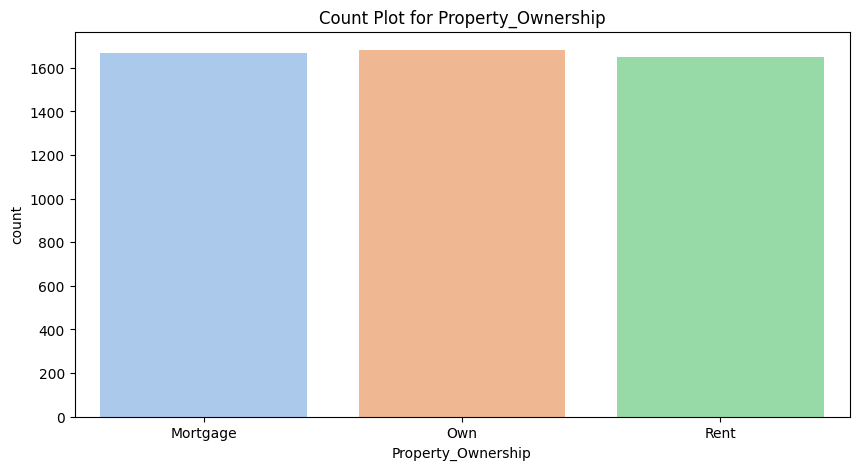

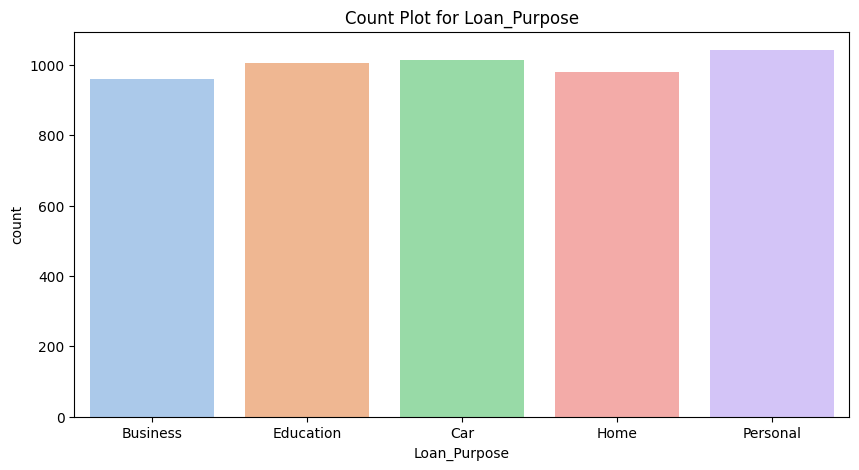

In [ ]:
categorical_cols = loan_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
  plt.figure(figsize=(10,5))
  sns.countplot(x=col, data=loan_df, hue=col, palette="pastel", legend=False)
  title=f"Count Plot for {col}"
  plt.title(title)
  plt.show()

Observation: There is no big difference between variables. This indicates there could be a need for techniques like oversampling or undersampling to improve the model performance.

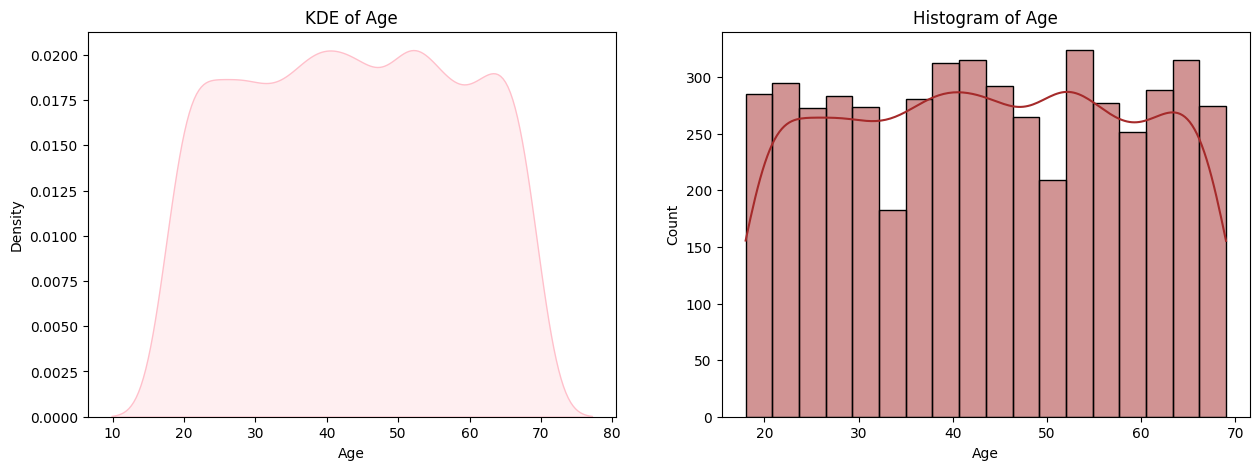

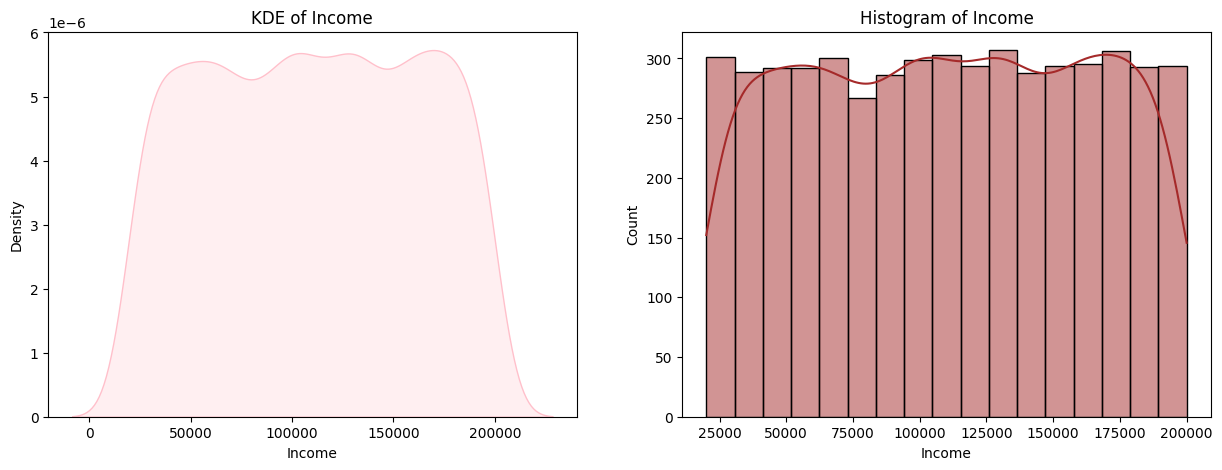

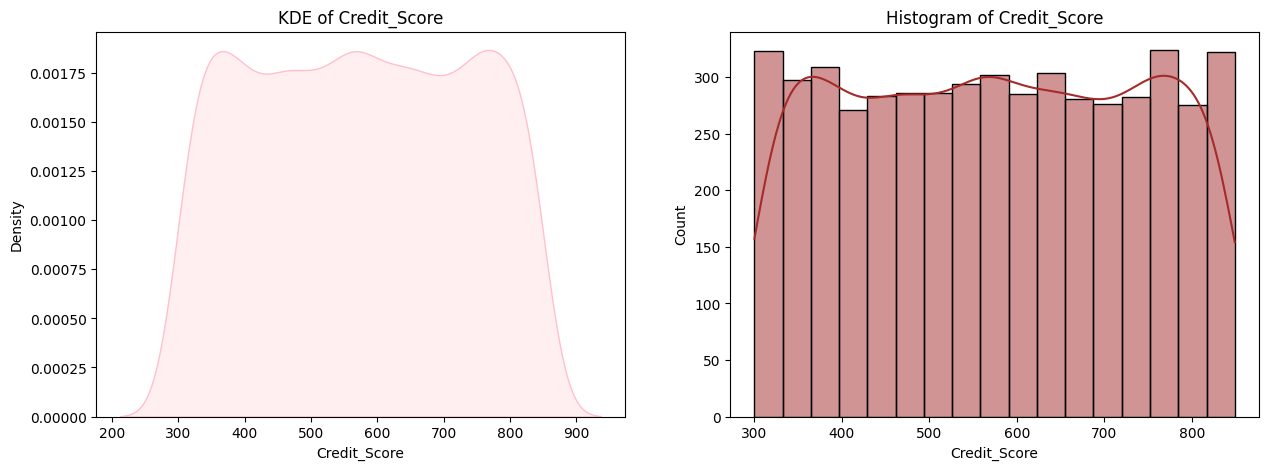

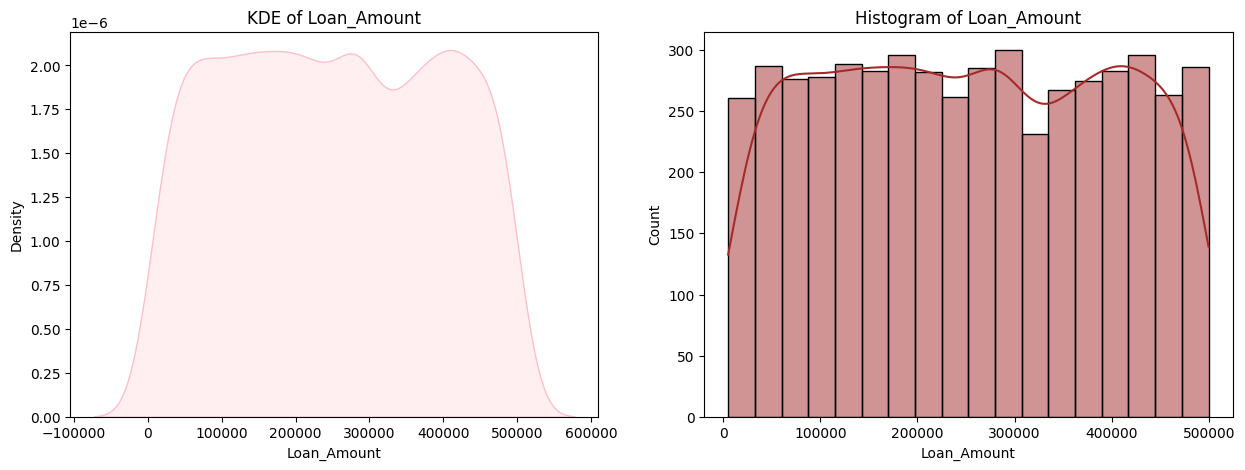

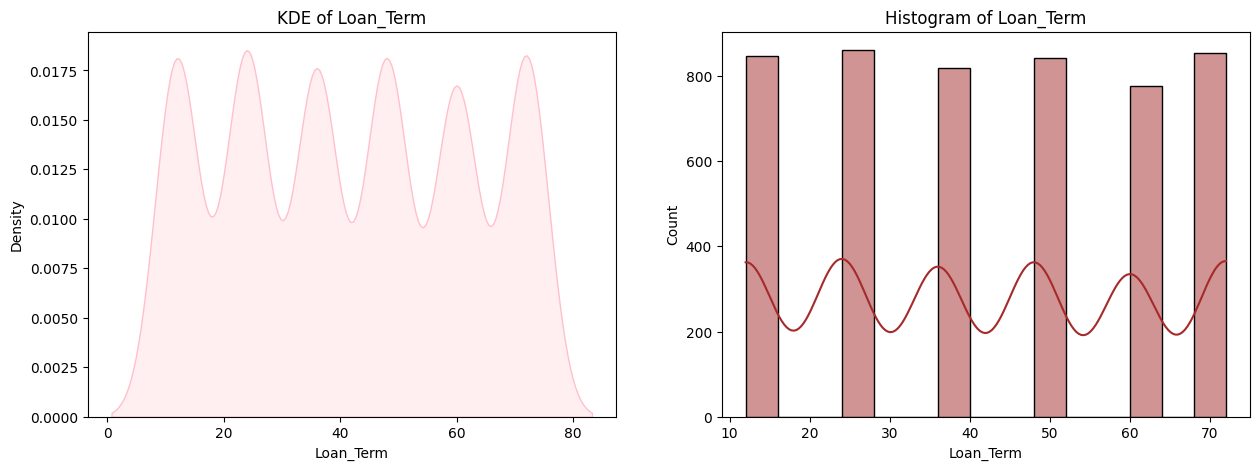

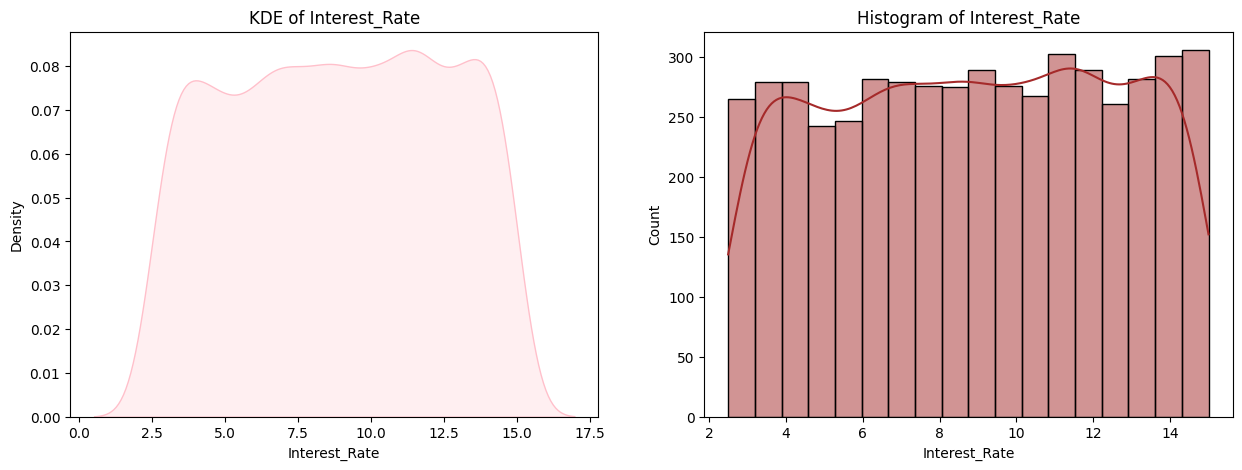

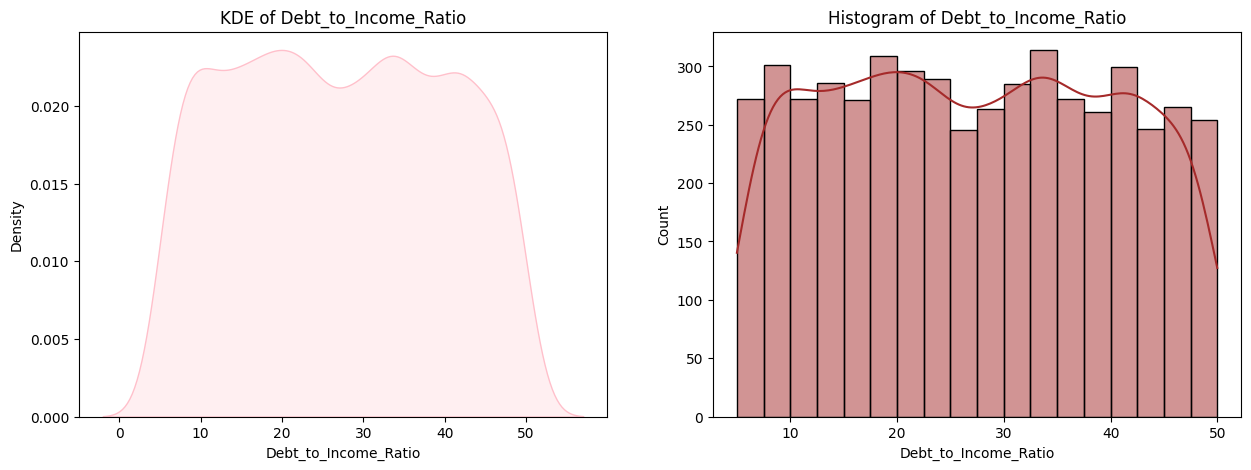

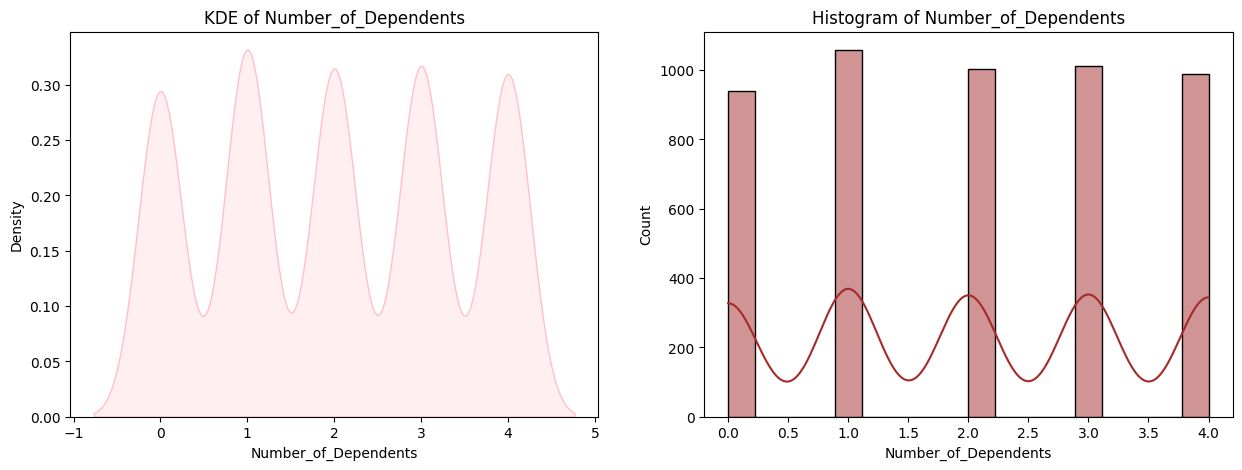

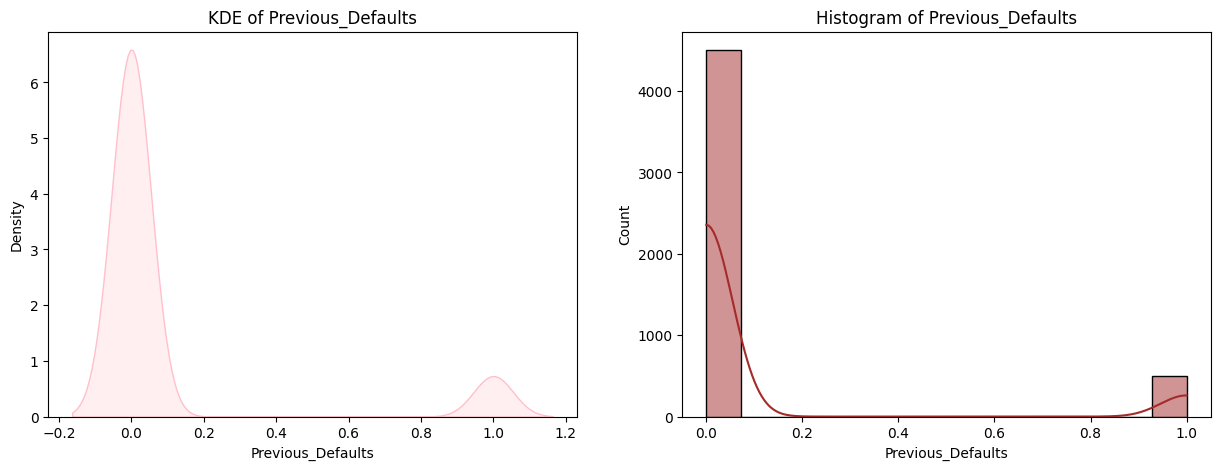

In [ ]:
# Select only numeric columns
numerical_cols = loan_df.select_dtypes(include=['int','float'])

for col in numerical_cols:
  fig, axs = plt.subplots(1, 2, figsize=(15, 5))
  sns.kdeplot(x=loan_df[col], ax=axs[0], fill=True, color="pink")
  axs[0].set_title(f"KDE of {col}")

  # Make side-by-side box plots and histograms
  sns.histplot(loan_df[col], kde=True, ax=axs[1], color='brown')
  axs[1].set_title(f"Histogram of {col}")
  plt.show()

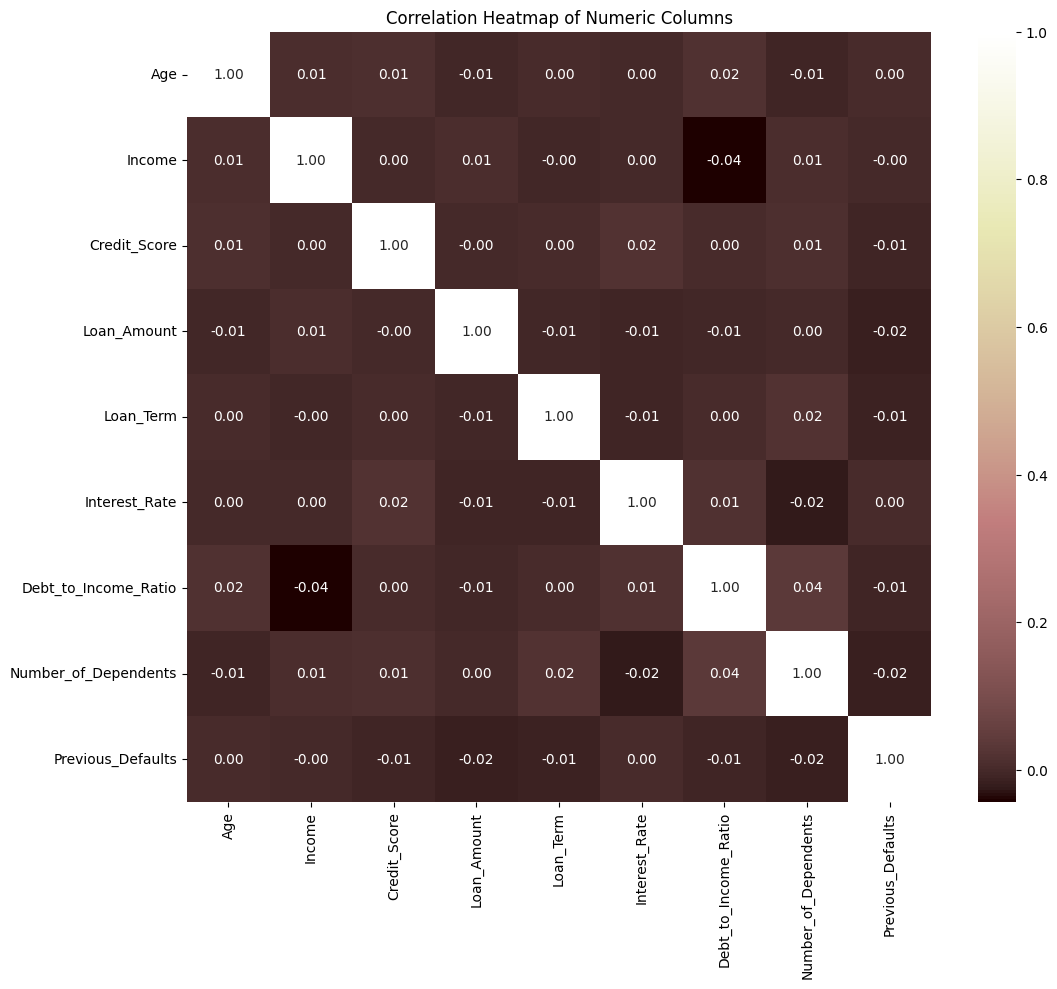

In [ ]:
# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(numerical_cols.corr(), annot=True, cmap='pink', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

Observation: The variables are not strongly correlated, which it would be hard to predict the outcome for our target variable.

###**Feature Engineering**

We transform the 'Previous_Defaults' column into a binary 'Risk_Flag' feature which it will be used to indicate whether the loan is risky or not (0 for not risky and 1 for risky).

In [ ]:
# Rename ['Previous_Defaults'] to ['Risk_Flag'] as binary, 1 as risky if Previous Defaults > 0, otherwise 0

loan_df['Risk_Flag'] = (loan_df['Previous_Defaults'] > 0).astype(int)

print(loan_df['Risk_Flag'].value_counts())

Risk_Flag
0    4503
1     497
Name: count, dtype: int64


In [ ]:
loan_df.drop('Previous_Defaults', axis=1, inplace=True) # We only use Risk_Flag for now, the Previous_Defaults column became unnecessary

loan_df.head()

,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Interest_Rate,Employment_Status,Debt_to_Income_Ratio,Marital_Status,Number_of_Dependents,Property_Ownership,Loan_Purpose,Risk_Flag
0,56,21920,639,452748,72,4.53,Unemployed,43.35,Married,2,Mortgage,Business,0
1,69,126121,655,257134,60,5.38,Unemployed,10.42,Divorced,0,Mortgage,Education,0
2,46,96872,467,226437,72,3.46,Self-Employed,45.39,Divorced,4,Mortgage,Car,0
3,32,101132,751,310480,12,14.00,Unemployed,8.58,Single,2,Mortgage,Business,0
4,60,22093,404,13070,12,9.13,Self-Employed,20.70,Divorced,1,Mortgage,Home,0


###**Train/Test Split For Machine Learning Algorithms**

Now we prepare the data for machine learning by splitting it into training and testing sets. We split the data into 80% for training and 20% for testing, with a random state of 123 for reproducibility.

In [ ]:
# Define X and y dataframes for train/test split
X = loan_df.drop('Risk_Flag', axis=1)
y = loan_df['Risk_Flag']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(y_train.value_counts())
print(y_test.value_counts())

Risk_Flag
0    3606
1     394
Name: count, dtype: int64
Risk_Flag
0    897
1    103
Name: count, dtype: int64


Machine learning models typically require numerical input, so we need to encode categorical variables. We will use one-hot encoding for nominal categorical variables (where order does not matter since they are all names) and concatenate the encoded features with numerical features.

In [ ]:
# Select categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

X_train_categorical = X_train[categorical_cols]
X_test_categorical = X_test[categorical_cols]

# One-Hot Encoding on selected columns
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoder.fit(X_train_categorical)

X_train_encoded = encoder.transform(X_train_categorical)
X_test_encoded = encoder.transform(X_test_categorical)

X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_train_categorical.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X_test_categorical.index)

# Concatenate encoded with numerical features
X_train_numerical = X_train.drop(columns=categorical_cols)
X_test_numerical = X_test.drop(columns=categorical_cols)

X_train = pd.concat([X_train_numerical, X_train_encoded], axis=1)
X_test = pd.concat([X_test_numerical, X_test_encoded], axis=1)

X_train.head()


,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Interest_Rate,Debt_to_Income_Ratio,Number_of_Dependents,Employment_Status_Employed,Employment_Status_Self-Employed,...,Marital_Status_Single,Marital_Status_Widowed,Property_Ownership_Mortgage,Property_Ownership_Own,Property_Ownership_Rent,Loan_Purpose_Business,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal
1863,53,190733,323,190770,48,8.12,15.68,0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
420,56,187031,509,171730,72,2.62,28.52,2,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3260,50,77042,626,232391,12,9.92,46.66,0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
742,38,171014,832,224606,24,6.49,36.07,2,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4809,21,199024,455,267781,24,11.78,9.15,2,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Many machine learning algorithms perform better when features are scaled:

In [ ]:
# Scale the data
std_scaler = StandardScaler()

# Fit-transform
X_train_scaled = std_scaler.fit_transform(X_train)

# And transform testing:
X_test_scaled = std_scaler.transform(X_test)


# Back to DataFrame:
X_train = pd.DataFrame(X_train_scaled, columns = X_train.columns, index = X_train.index)

# Back to DataFrame:
X_test = pd.DataFrame(X_test_scaled, columns = X_test.columns, index = X_test.index)

X_train

,Age,Income,Credit_Score,Loan_Amount,Loan_Term,Interest_Rate,Debt_to_Income_Ratio,Number_of_Dependents,Employment_Status_Employed,Employment_Status_Self-Employed,...,Marital_Status_Single,Marital_Status_Widowed,Property_Ownership_Mortgage,Property_Ownership_Own,Property_Ownership_Rent,Loan_Purpose_Business,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal
1863,0.626484,1.538967,-1.569542,-0.432529,0.298258,-0.210408,-0.895504,-1.431543,1.408137,-0.720141,...,-0.571962,-0.585819,-0.700224,-0.702604,1.39171,-0.488252,1.967767,-0.505073,-0.488645,-0.509748
420,0.827522,1.468285,-0.408076,-0.565581,1.458229,-1.726304,0.100753,-0.001966,-0.710158,1.388617,...,-0.571962,-0.585819,1.428115,-0.702604,-0.71854,-0.488252,-0.508190,-0.505073,-0.488645,1.961756
3260,0.425446,-0.631755,0.322524,-0.141680,-1.441700,0.285703,1.508239,-1.431543,-0.710158,1.388617,...,1.748369,-0.585819,1.428115,-0.702604,-0.71854,-0.488252,1.967767,-0.505073,-0.488645,-0.509748
742,-0.378705,1.162469,1.608879,-0.196082,-0.861714,-0.659665,0.686559,-0.001966,1.408137,-0.720141,...,-0.571962,1.707013,1.428115,-0.702604,-0.71854,-0.488252,-0.508190,1.979911,-0.488645,-0.509748
4809,-1.517919,1.697269,-0.745276,0.105626,-0.861714,0.798351,-1.402168,-0.001966,-0.710158,1.388617,...,1.748369,-0.585819,1.428115,-0.702604,-0.71854,-0.488252,-0.508190,-0.505073,2.046477,-0.509748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,1.497647,0.333042,-1.644475,1.280532,1.458229,-0.226945,1.474099,-0.716754,-0.710158,1.388617,...,-0.571962,-0.585819,-0.700224,-0.702604,1.39171,-0.488252,-0.508190,-0.505073,-0.488645,1.961756
4060,1.363622,-1.467597,0.528590,1.286492,-0.281728,0.475879,0.854154,-0.001966,-0.710158,1.388617,...,1.748369,-0.585819,-0.700224,1.423277,-0.71854,-0.488252,1.967767,-0.505073,-0.488645,-0.509748
1346,1.497647,-0.326417,-1.151164,1.554644,1.458229,0.260897,-0.883866,-1.431543,-0.710158,-0.720141,...,-0.571962,1.707013,-0.700224,1.423277,-0.71854,2.048122,-0.508190,-0.505073,-0.488645,-0.509748
3454,-0.043642,0.174569,0.840812,1.614504,0.298258,1.275169,1.073734,0.712823,-0.710158,-0.720141,...,-0.571962,-0.585819,-0.700224,-0.702604,1.39171,-0.488252,-0.508190,1.979911,-0.488645,-0.509748


###**Applying Logistic Regression Model**

Now we apply the logistic regression model to the data with a strong regularization parameter. We also need to balance the class weight because there are only 497 risky loans (1) compared to 4503 non-risky loans (0). This imbalance can lead to models that are biased towards the majority class.

In [ ]:
# Apply logistic regression model and fit it to the data
lr_model = LogisticRegression(C=1, class_weight='balanced')

lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

print(y_pred)

[0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0
 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0
 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1
 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1
 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1
 1 1 1 1 0 0 1 1 0 1 0 0 

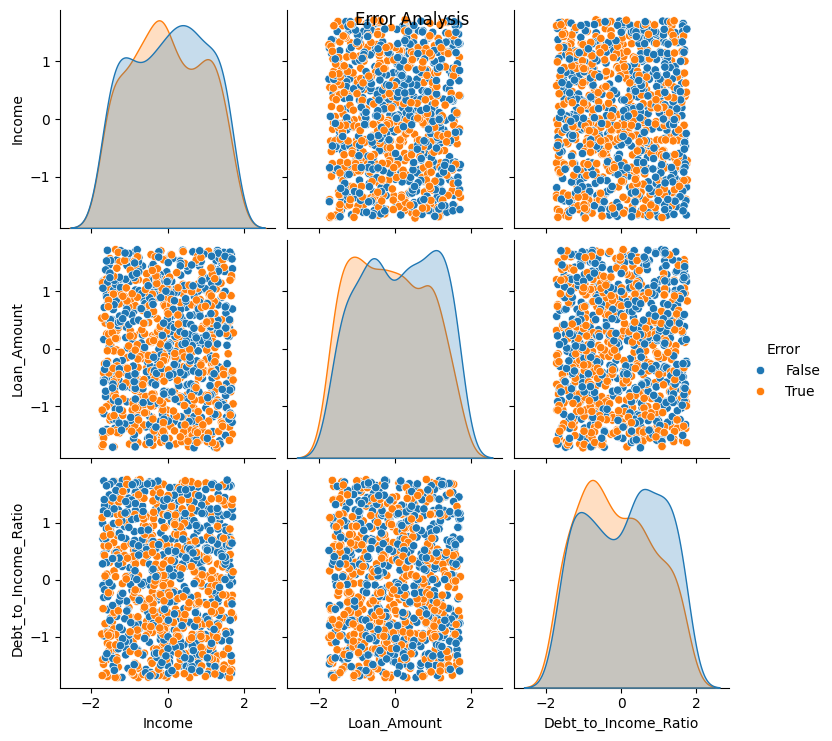

In [ ]:
errors = y_test != y_pred
X_test['Error'] = errors
sns.pairplot(X_test, hue='Error', vars=['Income', 'Loan_Amount', 'Debt_to_Income_Ratio'])
plt.suptitle('Error Analysis')
plt.show()

As we can see, the cluster of errors between 'Loan_Amount' and 'Debt_to_Income_Ratio' is high which it indicates the model has difficulty predicting risk for individuals with high debt and large loans.

###**Finding Optimal Regularization Parameter**

We need to find the optimal regularization parameter for the model to see which one fits best to the data using a grid-search with 5-fold cross-validation. The model will be then refitted with the optimal regularization value.

In [ ]:
lr_model_optimal = LogisticRegression(C=1, class_weight='balanced')

parameters = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(lr_model_optimal, parameters, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(C=1, class_weight='balanced'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='roc_auc')

We can now find and extract the best C parameter value:

In [ ]:
log_best = grid_search.best_params_['C']
log_best

0.0001

In [ ]:
# Fitting the model with the strongest regularization parameter:

log_best_model = LogisticRegression(C=log_best, class_weight='balanced')

log_best_model.fit(X_train_scaled, y_train)

y_pred_log = log_best_model.predict(X_test_scaled)

print(y_pred_log)

[0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1
 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1
 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0
 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1
 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1
 1 0 1 1 0 0 0 1 0 1 0 0 

Observation: We can see the smaller C value will have a stronger regularization from the cross-validation method. Tuning the regularization parameter helps improve the ROC AUC score. The prediction shows that most loans are not risky but again it could be due to class imbalance.

###**Logistic Regression Model Evaluation**

In [ ]:
# Reporting the metrics of the model with C=1 regularization
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

precision = cm[1,1] / (cm[1,1] + cm[0,1])

recall = cm[1,1] / (cm[1,1] + cm[1,0]) # = Sensitivity

f1 = cm[1,1] / (cm[1,1] + 1/2 * (cm[0,1] + cm[1,0]))

acc = accuracy_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", acc)

Confusion Matrix:
[[471 426]
 [ 60  43]]
Precision: 0.09168443496801706
Recall: 0.4174757281553398
F1 Score: 0.15034965034965034
Accuracy: 0.514


In [ ]:
# Reporting the metrics of the model with optimal regularization
cm = confusion_matrix(y_test, y_pred_log)

print("Confusion Matrix:")
print(cm)

precision = cm[1,1] / (cm[1,1] + cm[0,1])

recall = cm[1,1] / (cm[1,1] + cm[1,0]) # = Sensitivity

f1 = cm[1,1] / (cm[1,1] + 1/2 * (cm[0,1] + cm[1,0]))

acc = accuracy_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", acc)

Confusion Matrix:
[[467 430]
 [ 63  40]]
Precision: 0.0851063829787234
Recall: 0.3883495145631068
F1 Score: 0.13961605584642234
Accuracy: 0.514


In [ ]:
def plot_roc(y_truth, y_prob, ax):

  FPR, TPR, thresholds = roc_curve(y_truth, y_prob)

  ax.step(FPR, TPR, linewidth=2)
  ax.plot([0,1],[0,1], '--', color = 'black')

  fs = 12
  ax.set_xlabel('1 - Specificity = 1 - TNR = FPR', fontsize=fs)
  ax.set_ylabel('Sensitivity = TPR', fontsize=fs)
  ax.tick_params(axis='both', labelsize=fs)

  AUC = np.trapezoid(TPR, FPR)
  ax.set_title('ROC Curve, AUC = ' + str(round(AUC,4)))

In [ ]:
def plot_pr(y_truth, y_prob, ax):

  precisions, recalls, thresholds = precision_recall_curve(y_truth, y_prob)

  ax.step(recalls, precisions, linewidth=2)
  ax.grid()

  fs = 12
  ax.set_xlabel('Recall (Sensitivity)', fontsize=fs)
  ax.set_ylabel('Precision (PPV)', fontsize=fs)
  ax.tick_params(axis='both', labelsize=fs)

  ax.set_title('Precision-Recall Curve')
  ax.set_ylim([0, 1])
  ax.set_xlim([0, 1])

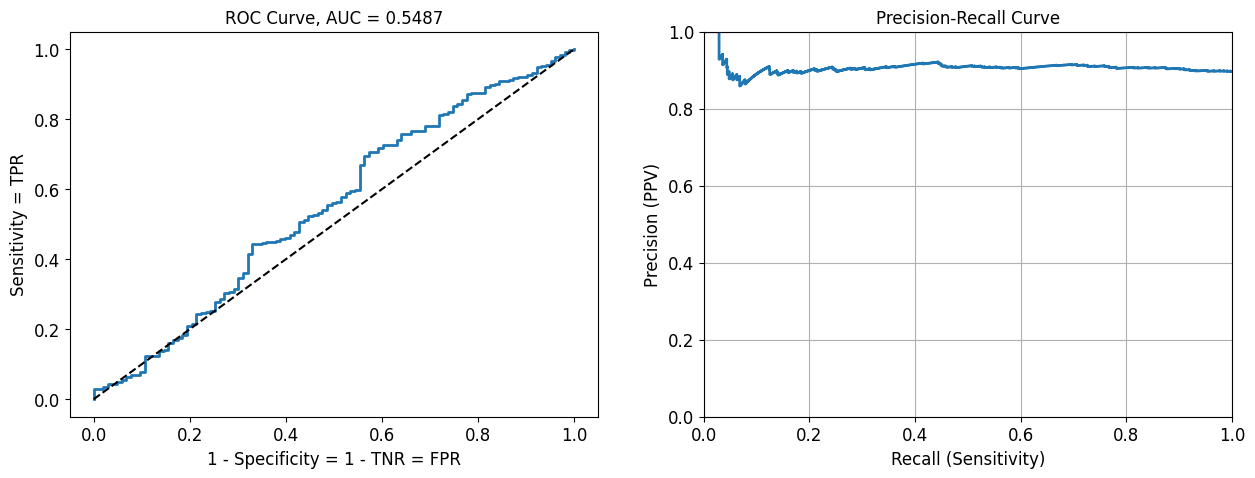

In [ ]:
# ROC and Precision-Recall Curves on Testing Data
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

y_prob = lr_model.predict_proba(X_test_scaled)[:,1]

plot_roc(1 - y_test, y_prob, axs[0])
plot_pr(1 - y_test, y_prob, axs[1])

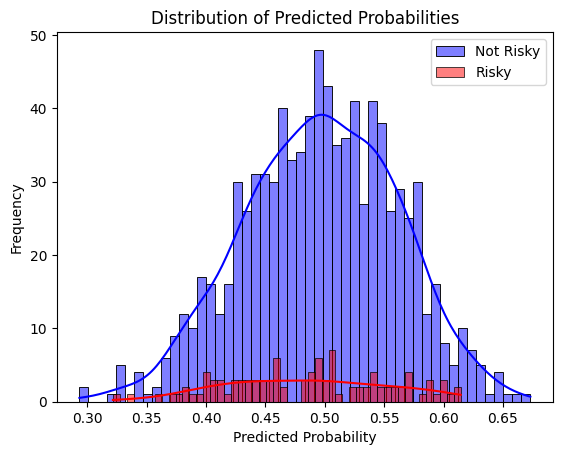

In [ ]:
sns.histplot(y_prob[y_test == 0], bins=50, color='blue', label='Not Risky', kde=True)
sns.histplot(y_prob[y_test == 1], bins=50, color='red', label='Risky', kde=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.show()

Observation: The "Not Risky" class has a peak at lower probabilities, indicating that the model is often confident in its predictions for this class. On the contrary, the "Risky" class has a broader distribution, suggesting that the model is less confident or consistent in its predictions for this class.

###**Working With 2 Features**

We now choose to focus on 'Loan Amount' and 'Number of Dependents' features because they have a higher correlation with our target variable compared to other variables. We want to see if they give a better prediction or if they affect our prediction for the target variable.

In [ ]:
X_train_2features = X_train[['Loan_Amount', 'Number_of_Dependents']]

# Now also grab for the testing set:
X_test_2features = X_test[['Loan_Amount', 'Number_of_Dependents']]

X_train_2features.head()

,Loan_Amount,Number_of_Dependents
1863,-0.432529,-1.431543
420,-0.565581,-0.001966
3260,-0.141680,-1.431543
742,-0.196082,-0.001966
4809,0.105626,-0.001966


In [ ]:
# Make our model again:
lr_model = LogisticRegression(C=0.0001, class_weight='balanced')

# And fit again:
lr_model.fit(X_train_2features, y_train)

yhat_risky = lr_model.predict(X_test_2features)

print(yhat_risky)

[0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1
 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0
 0 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1
 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0
 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1
 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1
 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0
 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1
 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1
 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1
 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0
 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 1 0 1 

In [ ]:
cm = confusion_matrix(y_test, yhat_risky)

precision = cm[1,1] / (cm[1,1] + cm[0,1])

recall = cm[1,1] / (cm[1,1] + cm[1,0])

f1 = cm[1,1] / (cm[1,1] + 1/2 * (cm[0,1] + cm[1,0]))

acc = accuracy_score(y_test, yhat_risky)

print("Confusion Matrix:")
print(cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", acc)

Confusion Matrix:
[[458 439]
 [ 54  49]]
Precision: 0.10040983606557377
Recall: 0.47572815533980584
F1 Score: 0.1658206429780034
Accuracy: 0.507


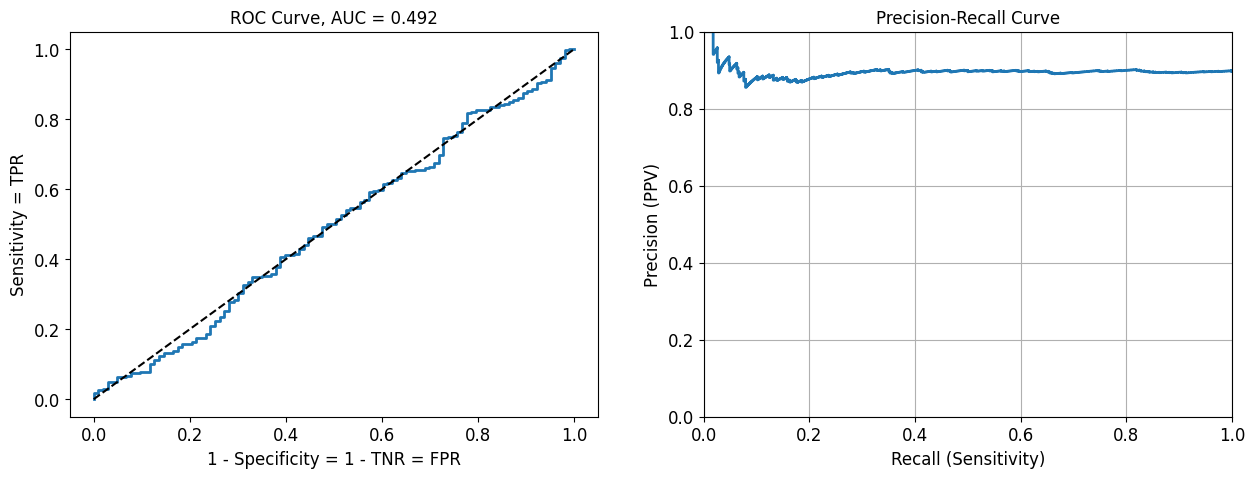

In [ ]:
# ROC and Precision-Recall on Testing Set of 2 Features:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

y_prob_risky = lr_model.predict_proba(X_test_2features)[:,1]

plot_roc(1 - y_test, y_prob_risky, axs[0])
plot_pr(1 - y_test, y_prob_risky, axs[1])

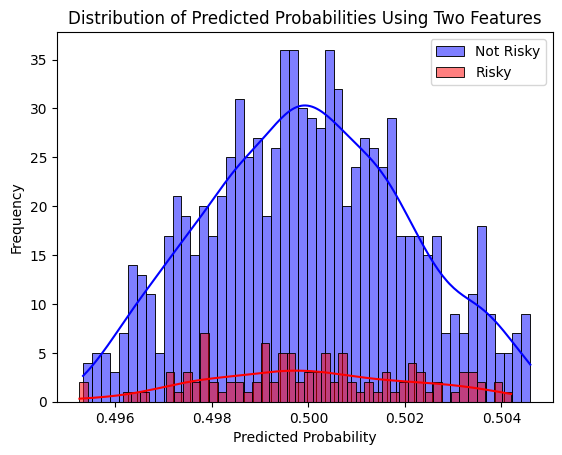

In [ ]:
sns.histplot(y_prob_risky[y_test == 0], bins=50, color='blue', label='Not Risky', kde=True)
sns.histplot(y_prob_risky[y_test == 1], bins=50, color='red', label='Risky', kde=True)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities Using Two Features')
plt.legend()
plt.show()

Observation: The distributions for both classes are highly overlapping, particularly around the predicted probability range of 0.496 to 0.504. This suggests that the model struggles to differentiate between the two classes when using only two features. Moreover, the lack of distinct peaks for each class indicates that the model's predictive performance is limited with the current feature set. The model does not show strong confidence in its predictions for either class.

###**Naive Bayes**

We will be working with categorical features so we need to select the columns with categorical features to estimate a Categorical Naive Bayes model:

In [ ]:
categorical = loan_df.select_dtypes(include=['object']).columns.tolist()
print(categorical)

continuous = loan_df.select_dtypes(include=['int', 'float']).columns.tolist()
print(continuous)

['Employment_Status', 'Marital_Status', 'Property_Ownership', 'Loan_Purpose']
['Age', 'Income', 'Credit_Score', 'Loan_Amount', 'Loan_Term', 'Interest_Rate', 'Debt_to_Income_Ratio', 'Number_of_Dependents', 'Risk_Flag']


We will use the encoded categorical features to train the Categorial Naive Bayes model

In [ ]:
# Categorical Naive Bayes

# Select categorical features from X_train and X_test
X_train_cat = X_train[X_train_encoded.columns]
X_test_cat = X_test[X_test_encoded.columns]

# Naive Bayes Classifier
clf = CategoricalNB(class_prior=[0.5, 0.5])

# Train
clf.fit(X_train_cat, y_train)

# Generate predictions for the categorical test data
y_pred_cat = clf.predict(X_test_cat)
print(y_pred_cat)

[0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0
 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1
 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1
 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1
 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0
 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1
 1 0 1 1 0 0 0 1 0 1 0 0 

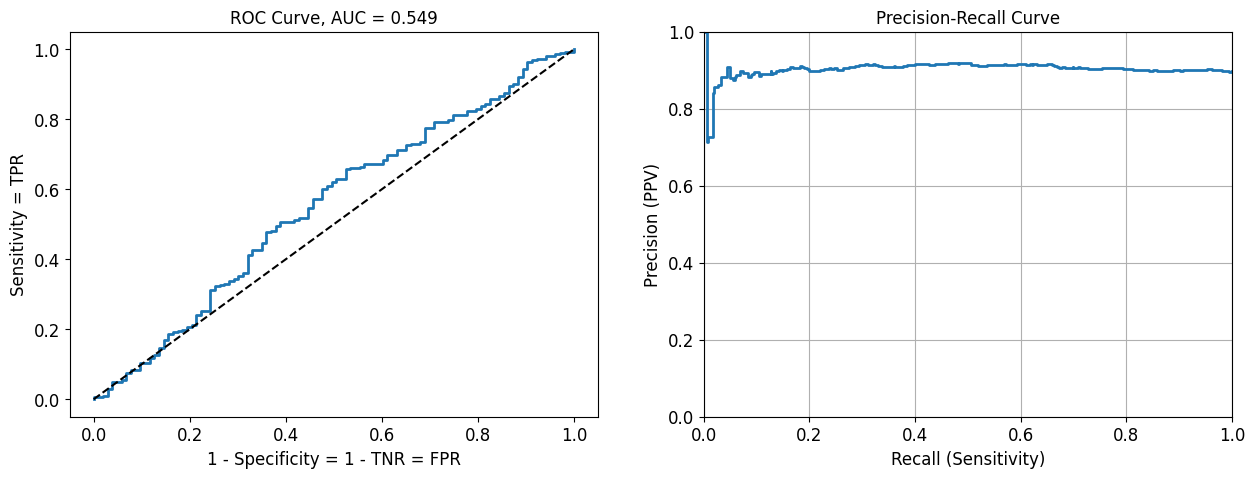

In [ ]:
# ROC and Precision-Recall Curves for Categorical Naive Bayes model
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

y_probas_cat = clf.predict_proba(X_test_cat)

plot_roc(1 - y_test, y_probas_cat[:,1], axs[0])
plot_pr(1 - y_test, y_probas_cat[:,1], axs[1])

We will be working with continuous features so we need to select the columns with continuous features to estimate a Continuous Naive Bayes model

In [ ]:
# Continuous (Numeric) Features
cont_features = X_train.select_dtypes(include=['number']).columns
X_train_cont = X_train[cont_features]
X_test_cont = X_test[cont_features]

# Initialize Gaussian Naive Bayes Model
gnb = GaussianNB(priors=[0.5, 0.5])

# Train
gnb.fit(X_train_cont, y_train)

# Generate predicitons for the continuous test data
y_pred_cont = gnb.predict(X_test_cont)

print(y_pred_cont)

[0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0
 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0
 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1
 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0
 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1
 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1
 1 0 1 1 0 0 0 1 0 1 0 0 

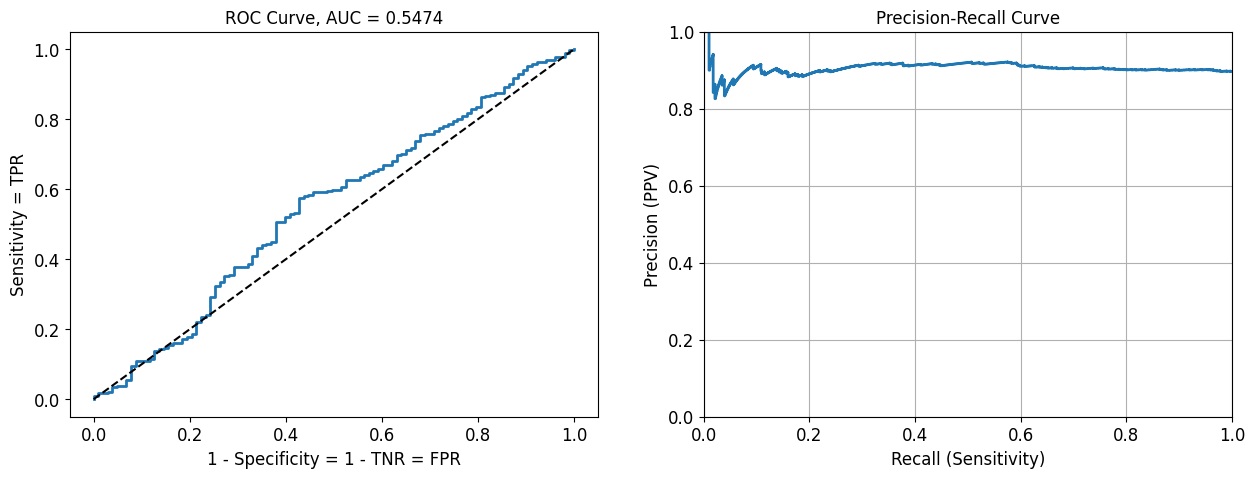

In [ ]:
# ROC and Precision-Recall Curves for Continuous Naive Bayes model
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

y_probas_cont = gnb.predict_proba(X_test_cont)
plot_roc(1 - y_test, y_probas_cont[:,1], axs[0])
plot_pr(1 - y_test, y_probas_cont[:,1], axs[1])

In [ ]:
print(y_probas_cat.shape)
print(y_probas_cont.shape)

(1000, 2)
(1000, 2)


In [ ]:
# Combine probabilities from the continuous and categorical models

# Obtain the prior
values, counts = np.unique(y_train, return_counts=True)

# Store as Pc
Pc = counts / counts.sum()

#Combine the probability vectors
y_probas_both = y_probas_cat * y_probas_cont / Pc

#Sum to 1
np.sum(y_probas_both, axis=1)[:10]

#Check if normalized
y_probas_both = np.divide(y_probas_both, np.sum(y_probas_both, axis=1).reshape(-1,1))

np.sum(y_probas_both, axis=1)[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

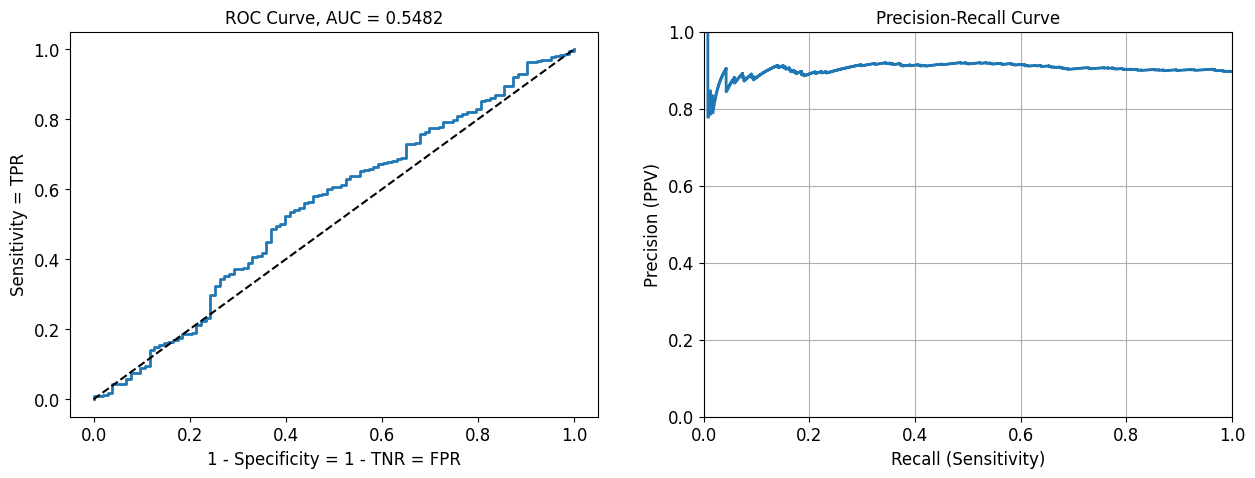

In [ ]:
# ROC and Precision-Recall Curves for combined (continuous and categorical) model
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

plot_roc(1 - y_test, y_probas_both[:,1], axs[0])
plot_pr(1 - y_test, y_probas_both[:,1], axs[1])

###**Hyperparameter tuning for Naive Bayes (categorical)**

In [ ]:
parameters_CNB = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

grid_search_CNB = GridSearchCV(estimator=clf, param_grid=parameters_CNB, cv=5, scoring='roc_auc')

grid_search_CNB.fit(X_train_cat, y_train)


GridSearchCV(cv=5, estimator=CategoricalNB(class_prior=[0.5, 0.5]),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='roc_auc')

Make predictions using the best Categorical Naive Bayes model:

In [ ]:
best_CNB_model = grid_search_CNB.best_estimator_
tuned_y_pred_cat = best_CNB_model.predict(X_test_cat)
print(tuned_y_pred_cat)

[0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0
 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1
 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1
 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0
 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0
 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1
 0 0 1 1 0 0 0 1 0 1 0 0 

Measure how well the model did:

In [ ]:
cm = confusion_matrix(y_test, tuned_y_pred_cat)

precision = cm[1,1] / (cm[1,1] + cm[0,1])

recall = cm[1,1] / (cm[1,1] + cm[1,0])

f1 = cm[1,1] / (cm[1,1] + 1/2 * (cm[0,1] + cm[1,0]))

acc = accuracy_score(y_test, tuned_y_pred_cat)

print("Confusion Matrix:")
print(cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", acc)

Confusion Matrix:
[[507 390]
 [ 67  36]]
Precision: 0.08450704225352113
Recall: 0.34951456310679613
F1 Score: 0.13610586011342155
Accuracy: 0.543


###**Hyperparameter tuning for Naive Bayes (continuous)**

We can tune a Gaussian Naive Bayes model by using the var_smoothing parameter to add a value to the variance to adjust and account for samples further away from the mean.

In [ ]:
np.logspace(0, -9, num=100)

array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
       5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
       2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
       1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
       4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
       1.87381742e-05, 1.51991108e-05, 1.23284674e-05, 1.00000000e-05,
      

In [ ]:
from sklearn.preprocessing import PowerTransformer

transformer = PowerTransformer()

X_train_cont_transformed = transformer.fit_transform(X_train_cont)
X_test_cont_transformed = transformer.transform(X_test_cont)

par_NB = {'var_smoothing': np.logspace(0, -10, num=100)}

grid_search_NB = GridSearchCV(estimator = gnb, param_grid = par_NB, cv = 5, scoring = 'roc_auc')

grid_search_NB.fit(X_train_cont_transformed, y_train)


GridSearchCV(cv=5, estimator=GaussianNB(priors=[0.5, 0.5]),
             param_grid={'var_smoothing': array([1.00000000e+00, 7.92482898e-01, 6.28029144e-01, 4.97702356e-01,
       3.94420606e-01, 3.12571585e-01, 2.47707636e-01, 1.96304065e-01,
       1.55567614e-01, 1.23284674e-01, 9.77009957e-02, 7.74263683e-02,
       6.13590727e-02, 4.86260158e-02, 3.85352859e-02, 3.05385551e-02,
       2.42012826e-02, 1.9...
       2.10490414e-08, 1.66810054e-08, 1.32194115e-08, 1.04761575e-08,
       8.30217568e-09, 6.57933225e-09, 5.21400829e-09, 4.13201240e-09,
       3.27454916e-09, 2.59502421e-09, 2.05651231e-09, 1.62975083e-09,
       1.29154967e-09, 1.02353102e-09, 8.11130831e-10, 6.42807312e-10,
       5.09413801e-10, 4.03701726e-10, 3.19926714e-10, 2.53536449e-10,
       2.00923300e-10, 1.59228279e-10, 1.26185688e-10, 1.00000000e-10])},
             scoring='roc_auc')

In [ ]:
grid_search_NB.best_params_

{'var_smoothing': np.float64(0.001484968262254465)}

In [ ]:
best_NB_model = grid_search_NB.best_estimator_
tuned_y_pred_cont = best_NB_model.predict(X_test_cont_transformed)
print(tuned_y_pred_cont)

[0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0
 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0
 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1
 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0
 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0
 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1
 1 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1
 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1
 1 0 1 1 0 0 0 1 0 1 0 0 

Measure how well the model did:

In [ ]:
cm = confusion_matrix(y_test, tuned_y_pred_cont)

precision = cm[1,1] / (cm[1,1] + cm[0,1])

recall = cm[1,1] / (cm[1,1] + cm[1,0])

f1 = cm[1,1] / (cm[1,1] + 1/2 * (cm[0,1] + cm[1,0]))

acc = accuracy_score(y_test, tuned_y_pred_cont)

print("Confusion Matrix:")
print(cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", acc)

Confusion Matrix:
[[445 452]
 [ 64  39]]
Precision: 0.07942973523421588
Recall: 0.3786407766990291
F1 Score: 0.13131313131313133
Accuracy: 0.484


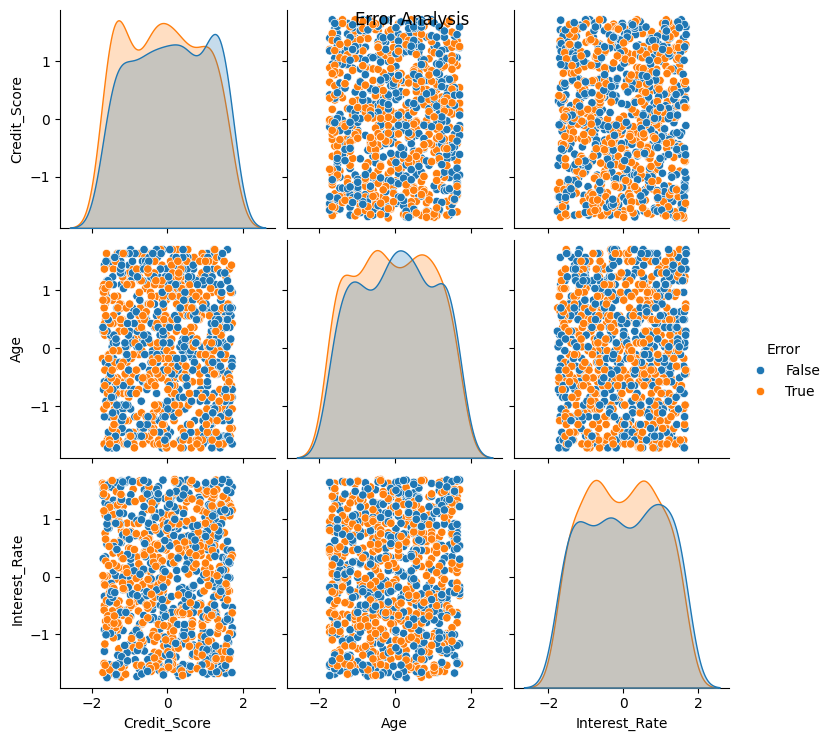

In [ ]:
errors = y_test != y_pred_cont
X_test_cont['Error'] = errors
sns.pairplot(X_test_cont, hue='Error', vars=['Credit_Score', 'Age', 'Interest_Rate'])
plt.suptitle('Error Analysis')
plt.show()

###**Conclusion**

